# Ensemble Model: Voting Regressor with GridSearchCV

In this section, we developed an ensemble model using a Voting Regressor that combines multiple regression models with hyperparameter tuning using GridSearchCV. Here's a summary of the key steps and results:

### Preprocessing
We standardized the data using StandardScaler for consistency across models.

### Models Used
   1. **Random Forest**: A decision tree-based ensemble model with hyperparameter tuning.
      - Parameters tuned: n_estimators, random_state.
      
   2. **K-Nearest Neighbors (KNN)**: An instance-based regression model with hyperparameter tuning.
      - Parameters tuned: n_neighbors.

   3. **Support Vector Machine (SVM)**: A support vector regression model with hyperparameter tuning.
      - Parameters tuned: C, gamma, kernel.

   4. **Linear Regression**: A simple linear regression model.

   5. **Neural Network**: A Multi-Layer Perceptron (MLP) regressor with hyperparameter tuning.
      - Parameters tuned: ramdom_state, hidden_layer_sizes, activation, solver, max_iter.
      - 
   6. **Decision Tree**: A decision tree regressor with hyperparameter tuning.
      - Parameters tuned: random_state.


**Note**: Only Random Forest and Decision Tree models were used for the final ensemble model. The other models were used for comparison purposes. 



### Voting Regressor
The Voting Regressor was created to combine these models, each with its optimized hyperparameters.

### Model Training
The Voting Regressor was trained on the training data.

### Model Evaluation
We evaluated the ensemble model on the test data using, Mean Absolute Error (MAE), and R-squared (R2) Score.


These metrics provide insight into the performance of the ensemble model, which leverages the strengths of various regression models with fine-tuned parameters.

You can use this ensemble model to make accurate predictions based on your dataset.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [17]:
# loading data
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
print("Data is loaded")

Data is loaded


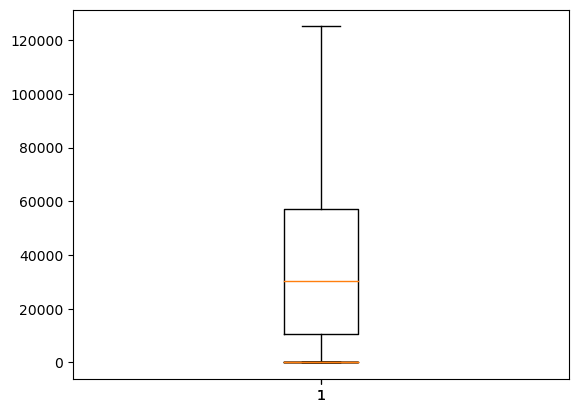

(array([27956], dtype=int64), array([2], dtype=int64))


In [18]:
# Visualize the data distribution
import matplotlib.pyplot as plt
plt.boxplot(train['radius'])
plt.boxplot(train['height'])
plt.boxplot(train['surface_area'])
plt.show()

# Statistical outlier detection
from scipy import stats
z = np.abs(stats.zscore(train))
print(np.where(z > 3))

In [39]:
#removing outliers
from scipy import stats
z = np.abs(stats.zscore(train))
train = train[(z < 3).all(axis=1)]

In [40]:
# Load and split the data
def split_data(train, test):
    X_train = train[['radius', 'height']]
    y_train = train['surface_area']
    
    X_test = test[['radius', 'height']]
    y_test = test['surface_area']
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data(train, test)

In [41]:
#preprocessing
preprocessor = StandardScaler()

#Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# K-Nearest Neighbors 
knn_model = KNeighborsRegressor(n_neighbors=4)

# # Support Vector Machine 
svm_model = SVR(kernel='rbf', C=100, gamma=0.1) 

# linear regression
lr_model = LinearRegression()

#decision tree
dt_model = DecisionTreeRegressor(random_state=42)

#neural network
nn_model = MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(100,100,100), activation='relu', solver='adam')



#add ridge regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)



# Voting Regressor that combines models
voting_regressor = VotingRegressor([
    ('random_forest', Pipeline([
        ('preprocessing', preprocessor),
        ('model', rf_model)
    ])),
    
    # ('knn', Pipeline([
    #     ('preprocessing', preprocessor),
    #     ('model', knn_model)
    # ])),

    ('dt_model', Pipeline([   
        ('preprocessing', preprocessor),
        ('model', dt_model)
    ]))

    # ('ridge', Pipeline([
    #     ('preprocessing', preprocessor),
    #     ('model', ridge_model)
    # ]))

    # ('svm', Pipeline([
    #     ('preprocessing', preprocessor),
    #     ('model', svm_model)  
    # ])),
    # ('lr_model', Pipeline([
    #     ('preprocessing', preprocessor),
    #     ('model', lr_model)
    # ])),
    # ('nn_model', Pipeline([
    #     ('preprocessing', preprocessor),
    #     ('model', nn_model)
    # ]))


])

# Fitting voting regressor
voting_regressor.fit(X_train, y_train)

# Predicting with combined model
y_pred = voting_regressor.predict(X_test)

# Evaluating the combined model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics for the combined model
print(f'Voting Regressor MAE: {mae}')
print(f'Voting Regressor R2: {r2}')


Voting Regressor MAE: 122.8768279210872
Voting Regressor R2: 0.999963585462431


In [43]:
import joblib

joblib.dump(voting_regressor, 'voting.joblib')


['voting.joblib']

In [ ]:
# #preprocessing
# preprocessor = StandardScaler()

# # Random Forest
# rf_model = RandomForestRegressor()
# # Parameter grid for Random Forest
# rf_params = {'n_estimators': [100, 200, 500], 
#              'max_depth': [5, 10, 20],
#              'max_features': ['auto', 'sqrt', 'log2']}



# # K-Nearest Neighbors 
# knn_model = KNeighborsRegressor()
# # Parameter grid for KNN  
# knn_params = {'n_neighbors': [2, 5, 10],
#               'weights': ['uniform', 'distance'],
#               'leaf_size': [10, 20, 30]} 



# # # Support Vector Machine 
# svm_model = SVR() 
# # Parameter grid for SVM
# svm_params = {'C': [0.1, 1, 10, 100], 
#               'gamma': ['scale', 'auto', 0.1, 1],
#               'kernel': ['rbf', 'poly', 'sigmoid']}


# #linear regression
# from sklearn.linear_model import LinearRegression
# lr_model = LinearRegression()


# # Neural Network
# nn_model = MLPRegressor()
# # Define param grid
# nn_params = {'hidden_layer_sizes':[(10,), (20,), (50,)],  
#              'activation':['relu', 'tanh'],
#              'solver':['sgd', 'adam'],
#              'learning_rate':['constant','adaptive'],
#              'max_iter':[100, 200, 500]}


# # GridSearchCV for each model
# gs_nn = GridSearchCV(nn_model, nn_params, cv=5)
# gs_rf = GridSearchCV(rf_model, rf_params, cv=5)
# gs_knn = GridSearchCV(knn_model, knn_params, cv=5)
# gs_svm = GridSearchCV(svm_model, svm_params, cv=5)
# gs_lr = GridSearchCV(lr_model, {}, cv=5)





# # Voting Regressor that combines models
# voting_regressor = VotingRegressor([
#     ('rf', gs_rf),
#     ('knn', gs_knn),
#     # ('svm', gs_svm),
#     # ('lr', gs_lr),
#     # ('nn', gs_nn)
# ])

# # Fitting voting regressor
# voting_regressor.fit(X_train, y_train)

# # Predicting with combined model
# y_pred = voting_regressor.predict(X_test)

# # Evaluating the combined model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print evaluation metrics for the combined model
# print(f'Voting Regressor MSE: {mse}')
# print(f'Voting Regressor MAE: {mae}')
# print(f'Voting Regressor R2: {r2}')
